In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('C:\\Users\\bhush\\Downloads\\EDA\\Projects\\Python_Diwali_Sales_Analysis\\Python_Diwali_Sales_Analysis\\Diwali Sales Data.csv',encoding= 'unicode_escape')

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.shape

(11251, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [17]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
df.dropna(inplace=True)

In [21]:
df['Amount'] = df['Amount'].astype('int')

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

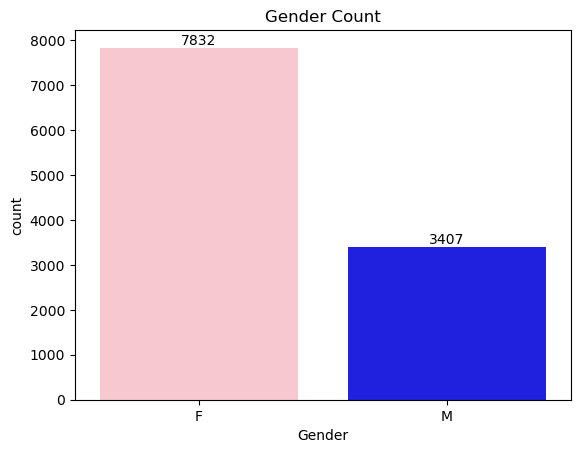

In [32]:
# plotting a bar chart for Gender and it's count
a = sns.countplot(x = df['Gender'],palette=['pink','blue'])

for i in a.containers:
    a.bar_label(i)
plt.title('Gender Count')
plt.show()


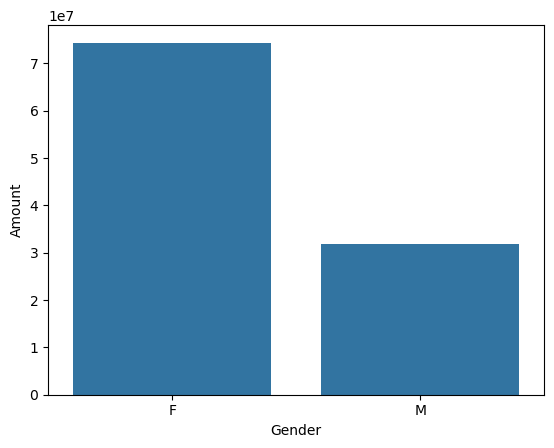

In [48]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

a = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)
plt.show()

#### Age

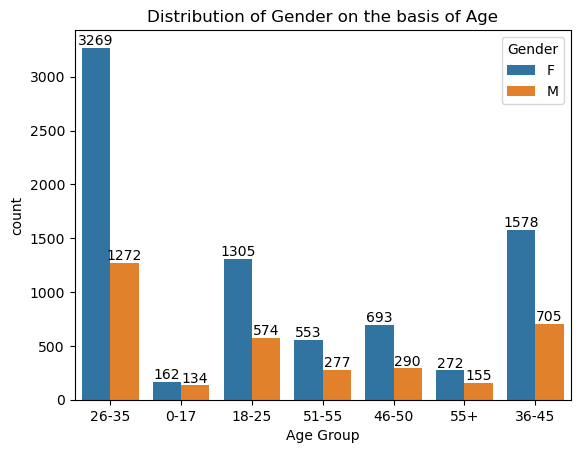

In [41]:
a = sns.countplot(data=df, x ='Age Group',hue= 'Gender')
for i in a.containers:
    a.bar_label(i)
plt.title('Distribution of Gender on the basis of Age')
plt.show()

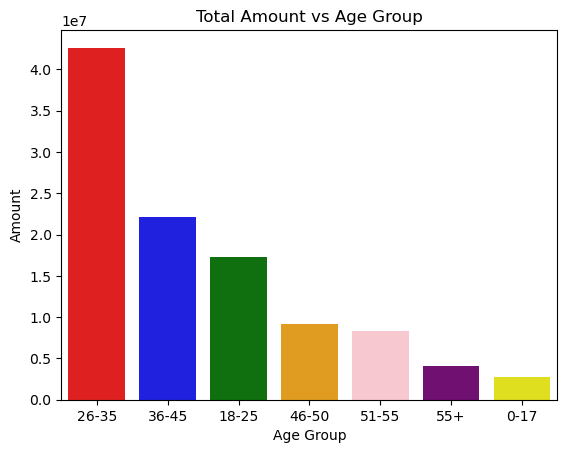

In [47]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,palette=['red','blue','green','orange','pink','purple','yellow'])
plt.title('Total Amount vs Age Group')
plt.show()

#### State

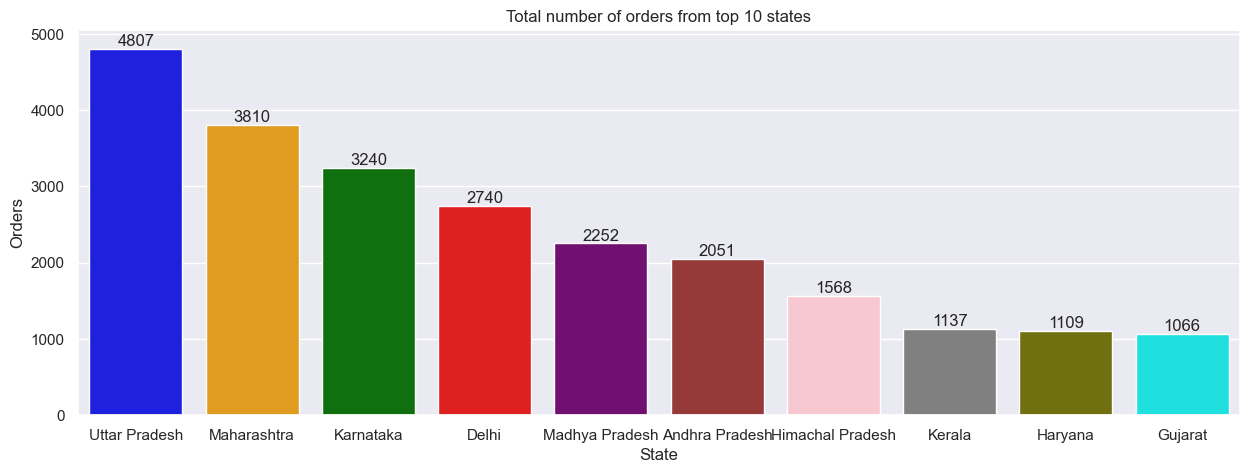

In [93]:
plt.figure(figsize=(15, 5))
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

a = sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender'
])
for i in a.containers:
    a.bar_label(i)
plt.title('Total number of orders from top 10 states')
plt.show()

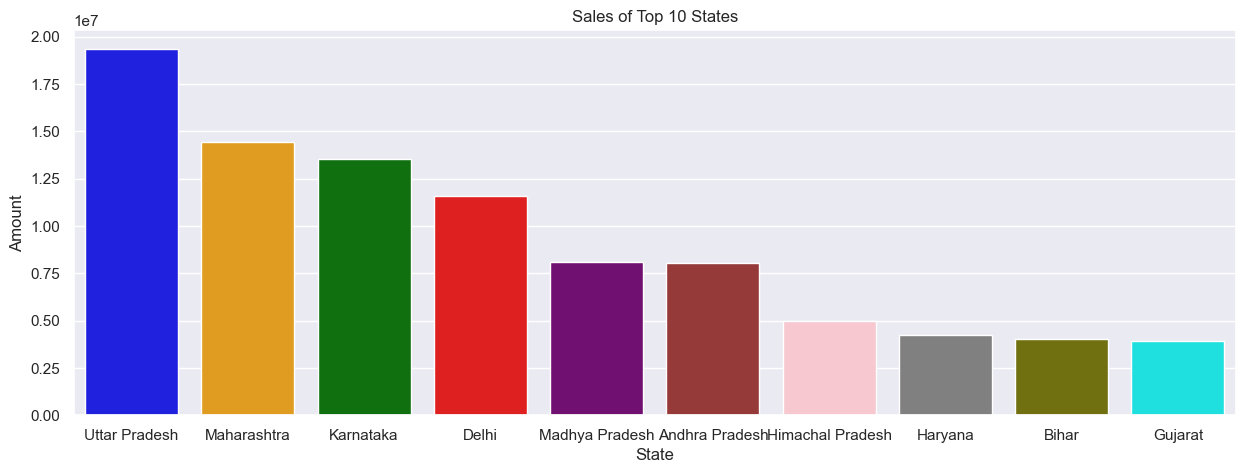

In [92]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',palette = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender'
])
plt.title('Sales of Top 10 States')
plt.show()

#### Marital Status

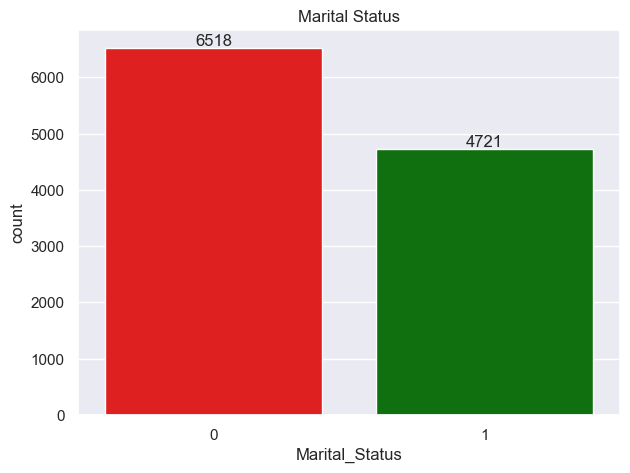

In [65]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data = df, x = 'Marital_Status',palette=['red','green'])
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Marital Status')
plt.show()

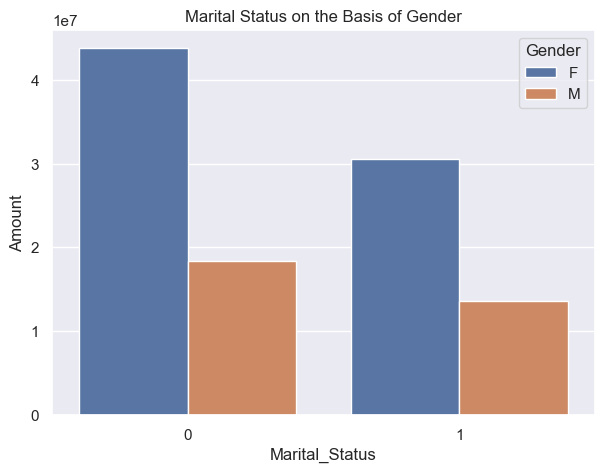

In [67]:
plt.figure(figsize=(7,5))
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

plt.title('Marital Status on the Basis of Gender')
plt.show()

#### Occupation

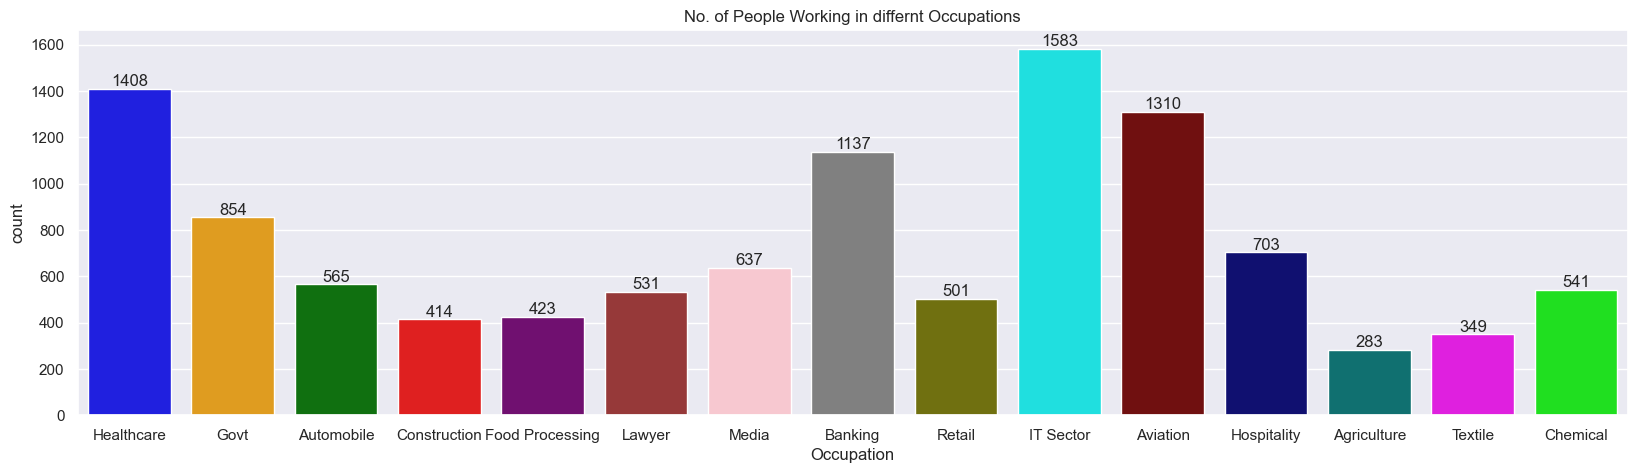

In [91]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data = df, x = 'Occupation',palette = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender'
])

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('No. of People Working in differnt Occupations')
plt.show()

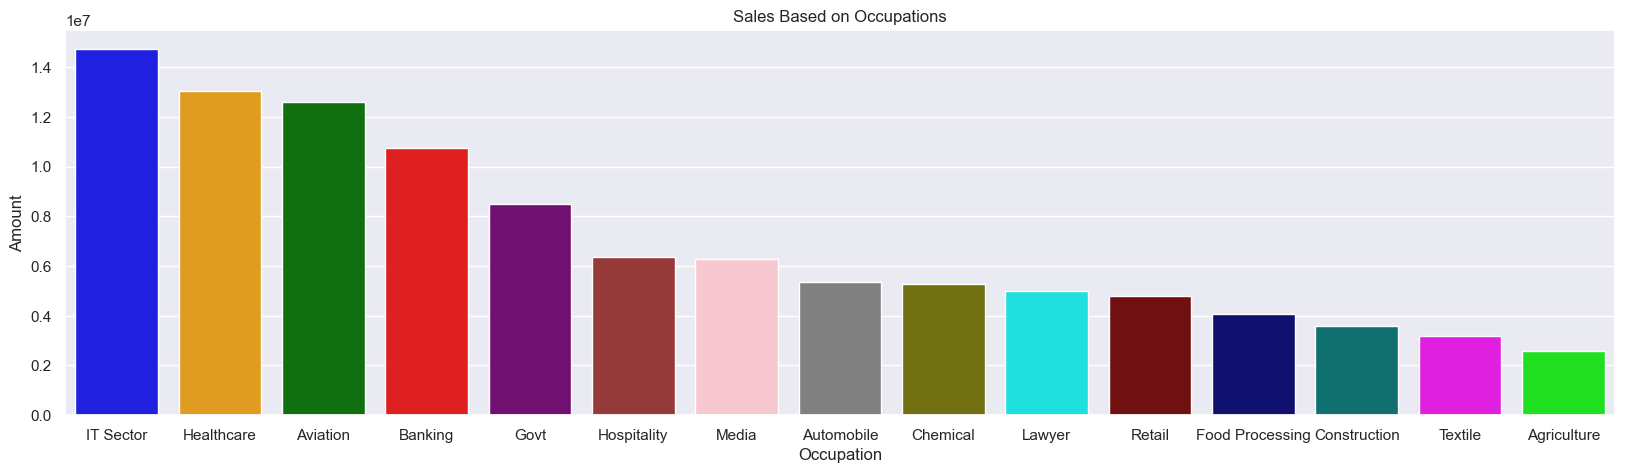

In [89]:
plt.figure(figsize=(20,5))
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',palette = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender'
])
plt.title('Sales Based on Occupations')
plt.show()

#### Product Category 

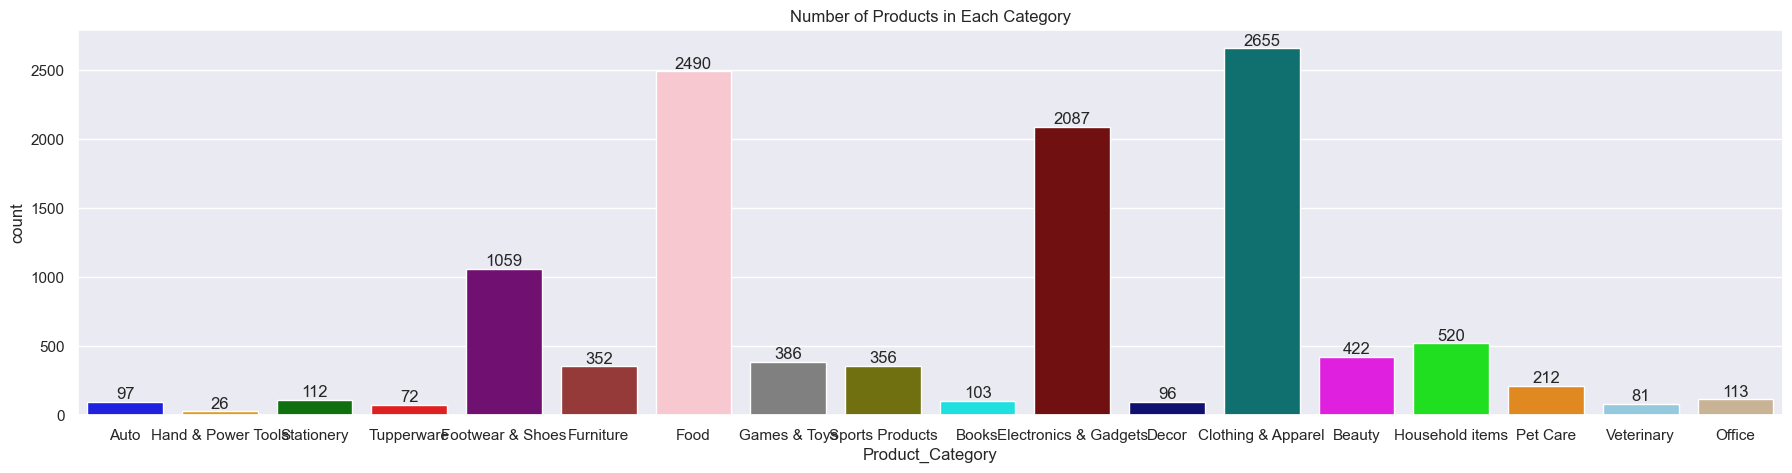

In [88]:
plt.figure(figsize=(22,5))
ax = sns.countplot(data = df, x = 'Product_Category',palette = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender'
])

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Products in Each Category")
plt.show()

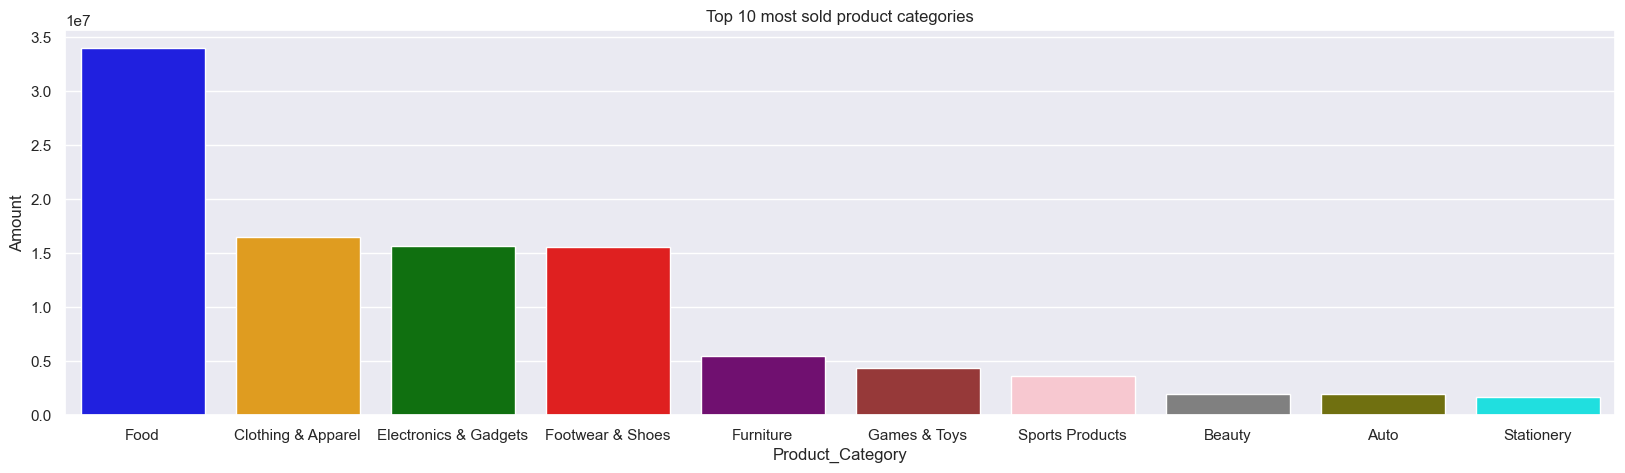

In [85]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',palette = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender'
])
plt.title('Top 10 most sold product categories')
plt.show()

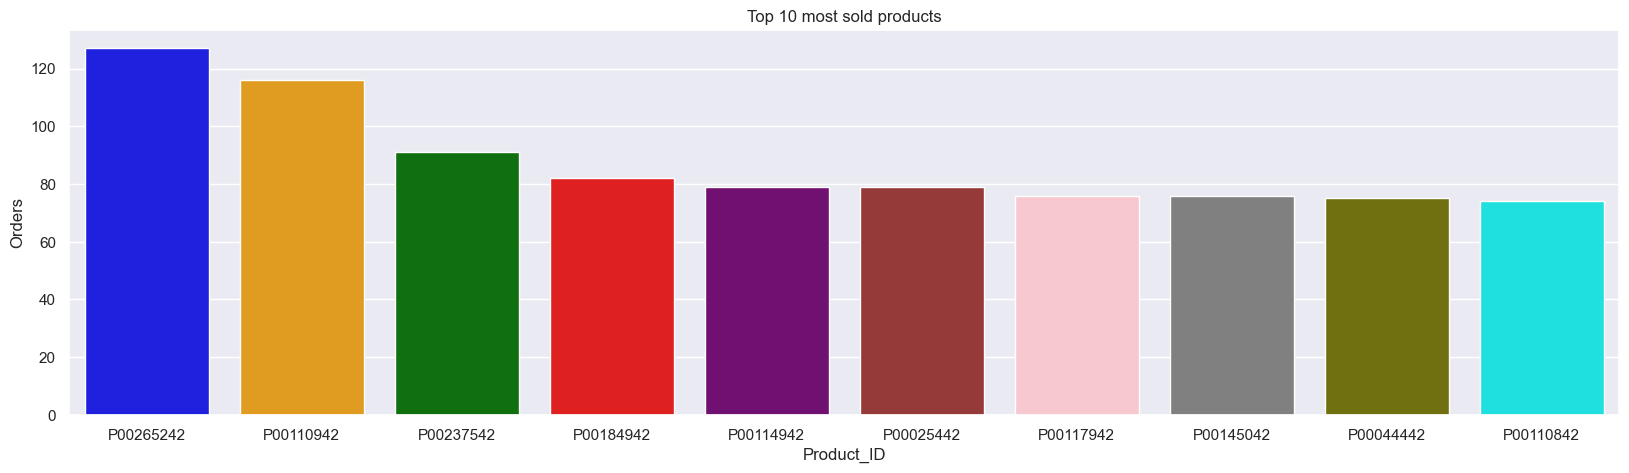

In [87]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',palette = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'maroon', 'navy', 'teal', 'magenta', 'lime', 'darkorange', 'skyblue', 'tan', 'salmon', 'lavender'
])
plt.title('Top 10 most sold products')
plt.show()